# Machine-readable tables for ApJ submission
## Purpose:
- Generate machine-readable tables for K2-28b and K2-100b which can be used to recreate the light curves and the best fit models with residuals

## Format of the files
- csv files
- The headers include: BJD, Normalized flux, Normalized flux error, Airmass, X centroid, Y centroid, Best fit model, and Residual

In [11]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../src/")

# Read in data from K2 data, our ground-based observations and AIJ measurement tables
# data for K2-28b
df_ground_k2_28b = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_28b = pd.read_csv("../data/k2_28b/K2_data_k2_28b_for_plotting_k2.csv",sep=",",header=0)
# data for K2-100b
df_ground_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_ground.csv",sep=",",header=0)
df_k2_k2_100b = pd.read_csv("../data/k2_100b/K2_data_k2_100b_for_plotting_k2.csv",sep=",",header=0)
# data from AstroImageJ
aij_k2_28b=pd.read_csv("../data/k2_28b/Processed_K2-28b-diffuserin-30s_measurements.xls",sep="\t",header=0)
aij_k2_100b=pd.read_csv("../data/k2_100b/Processed_k2-100_sdssi_4x4_quad_fast_14_measurements.xls",sep="\t",header=0)
# Take out bad points
aij_k2_100b = aij_k2_100b[0:-20]
aij_k2_28b = aij_k2_28b[0:-20]

In [3]:
# Generate the machine readable table for K2-28b and save it to a csv file
k2_28b_csv=pd.DataFrame({'BJD': aij_k2_28b['BJD_TDB'],'Normalized flux':df_ground_k2_28b['scaled_flux_ground'],
                         'Normalized flux error': df_ground_k2_28b['scaled_error_ground'],
                         'Airmass':aij_k2_28b['AIRMASS'],'X centroid':aij_k2_28b['X(FITS)_T1']
                        ,'Y centroid':aij_k2_28b['Y(FITS)_T1'],'Best fit model':df_ground_k2_28b['ymodel_ground'],
                        'Residual':df_ground_k2_28b['yresidual_ground']})
k2_28b_csv.to_csv('../data/K2-28b_table.csv')

In [4]:
# Generate the machine readable table for K2-100b and save it to a csv file
k2_100b_csv=pd.DataFrame({'BJD': aij_k2_100b['BJD_TDB'],'Normalized flux':df_ground_k2_100b['scaled_flux_ground'],
                         'Normalized flux error': df_ground_k2_100b['scaled_error_ground'],
                         'Airmass':aij_k2_100b['AIRMASS'],'X centroid':aij_k2_100b['X(FITS)_T1']
                        ,'Y centroid':aij_k2_100b['Y(FITS)_T1'],'Best fit model':df_ground_k2_100b['ymodel_ground'],
                        'Residual':df_ground_k2_100b['yresidual_ground']})
k2_100b_csv.to_csv('../data/K2-100b_table.csv')

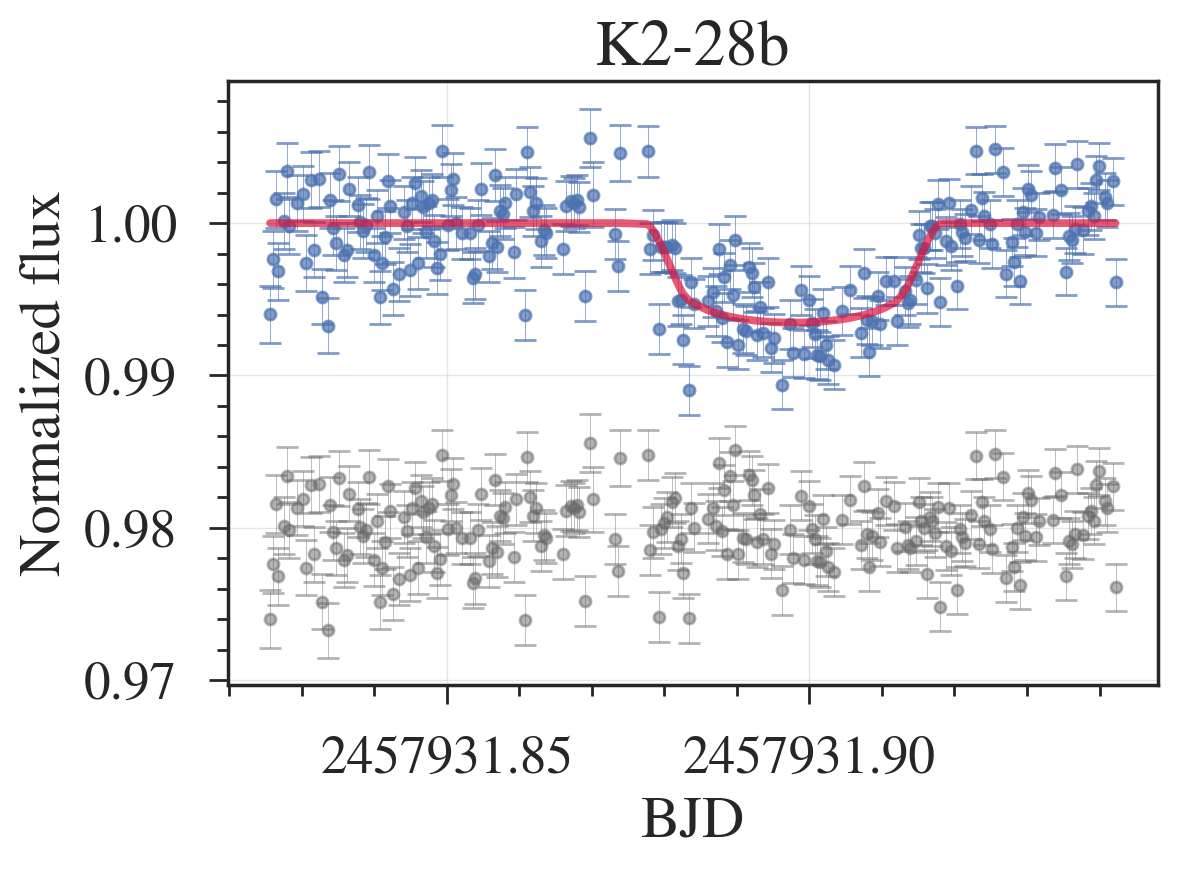

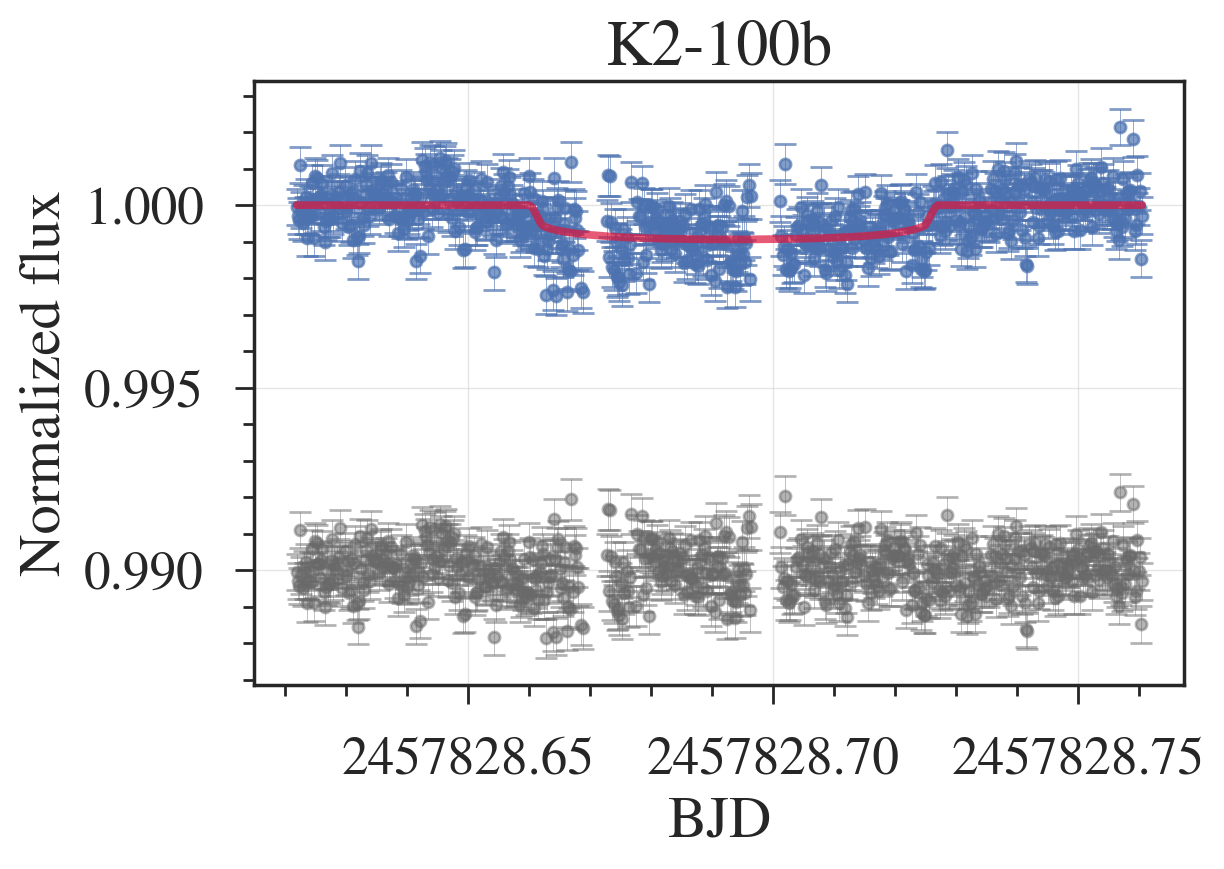

In [18]:
# Recreate the light curve and the best fit models using the plot_transits function and the machine-readable tables
import plot_transits
import matplotlib.pylab as plt
%matplotlib inline

#Plot K2-28b light curve with plot_transits function
fig, ax = plt.subplots(figsize=(6,4))
plot_transits.plot_transit_with_model(k2_28b_csv['BJD'],
                        k2_28b_csv['Normalized flux'],
                        k2_28b_csv['Normalized flux error'],
                        yresidual=k2_28b_csv['Residual'],
                        xmodel=k2_28b_csv['BJD'],
                        ymodel=k2_28b_csv['Best fit model'],ax=ax,offset=0.98)
ax.set_title('K2-28b')

#Plot K2-100b light curve with plot_transits function
fig, ax1 = plt.subplots(figsize=(6,4))
plot_transits.plot_transit_with_model(k2_100b_csv['BJD'],
                        k2_100b_csv['Normalized flux'],
                        k2_100b_csv['Normalized flux error'],
                        yresidual=k2_100b_csv['Residual'],
                        xmodel=k2_100b_csv['BJD'],
                        ymodel=k2_100b_csv['Best fit model'],ax=ax1,offset=0.99)
ax1.set_title('K2-100b')